In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from src.data_reading import parse_galaxy_data
from src.data_treatment_tools import add_radian_columns, new_CoM_procedure 
from src.data_display import    (display_hubble_MW, 
                                display_velocities_distance, 
                                display_velocities_distance_color, 
                                animated_velocities_distance,
                                display_mean_squared_velocity,
                                display_velocities_distance_hubble_regression
                                )
from IPython.display import clear_output

In [2]:
galaxy_1_CoM =  "N5128,Cen A"
galaxy_2_CoM =  "N5236, M83"
r=0.76

In [3]:
file_path = 'data/data_clean.txt'
galaxy_df = parse_galaxy_data(file_path)
add_radian_columns(galaxy_df)
new_CoM_procedure(galaxy_df,galaxy1=galaxy_1_CoM,galaxy2=galaxy_2_CoM,m1_barre=r)

CoM_N5128,Cen A_N5236, M83_0.76


c:\Users\Adrian\Documents\X\Stage 3A recherche\projet\project_3A\src\data_treatment_tools.py:78: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '300.19228135818446' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[len(df)] = new_row


In [ ]:
def add_pertubative_distances(df:pd.DataFrame,galaxy_center:str)->None:
    """add a new row to the galaxy dataframe containing pertubative distances between all the galaxies and a given galaxy_center 

    Args:
        df (pd.DataFrame): DataFrame containing the data about the galaxy
        galaxy_center (str): Name of the galaxy that will be used as the center of the cluster
    """
    Rc= float(df.loc[df["Name"]==galaxy_center,"Dis"].iloc[0])
    Rg ,theta = df['Dis'],df["angular_distance_"+galaxy_center]
    gamma= (Rg/Rc) - 1
    print(gamma)
    alpha=np.sin(theta/2)
    # Calculer distance
    dis_center = alpha*(2+gamma)*Rc #normalement il y a une valeur absolue sur le sin(theta) mais ici tout les sinus sont positif)
    # Ajouter la colonne au DataFrame
    df['pertubative_dis_center_'+galaxy_center] = dis_center
    
    # add incertainty
    e_Rc = float(df.loc[df["Name"]==galaxy_center,"e_Dis"].iloc[0])
    e_Rg = df['e_Dis']
    
    e_dis_center = alpha*(e_Rc*(2+gamma)+Rc*((e_Rg*Rc+e_Rc*Rg)/Rc**2))
    
    df['e_pertubative_dis_center_'+galaxy_center] = e_dis_center

In [5]:
add_pertubative_distances(galaxy_df,"CoM_N5128,Cen A_N5236, M83_0.76")

0     0.120051
1    -0.073568
2    -0.666681
3    -0.674033
4    -0.686288
        ...   
82   -0.242679
83    0.421509
84    0.568562
85   -0.401986
86   -0.784323
Name: Dis, Length: 70, dtype: float64


In [6]:
galaxy_df.head(4)

,Name,RAh,RAm,RAs,DE-,DEd,DEm,DEs,T,Theta,...,Dec_radians,"cos_theta_CoM_N5128,Cen A_N5236, M83_0.76","angular_distance_CoM_N5128,Cen A_N5236, M83_0.76","dis_center_CoM_N5128,Cen A_N5236, M83_0.76","e_dis_center_CoM_N5128,Cen A_N5236, M83_0.76","major_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76","minor_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76","major_infall_velocity_bis_CoM_N5128,Cen A_N5236, M83_0.76","pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76","e_pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"
0,E059-01,7.0,31.0,19.3,-,68.0,11.0,10.0,9,-1.5,...,-1.190072,0.587529,0.942795,3.952484,1.297329,124.841232,240.646052,442.647810,3.928318,0.733227
1,N2915,9.0,26.0,11.5,-,76.0,37.0,35.0,10,-1.3,...,-1.337383,0.700744,0.794356,3.053027,1.788487,-87.389119,196.237306,365.280579,3.040453,0.593621
2,"SexB,DDO70",10.0,0.0,0.1,+,5.0,19.0,56.0,10,-0.7,...,0.093065,0.413689,1.144294,3.729108,0.539282,149.953707,273.401312,269.565347,2.945516,0.387303
3,N3109,10.0,3.0,7.2,-,26.0,9.0,36.0,9,-0.1,...,-0.456578,0.711040,0.779820,3.271023,0.698407,215.370919,234.825777,231.647022,2.056433,0.273534


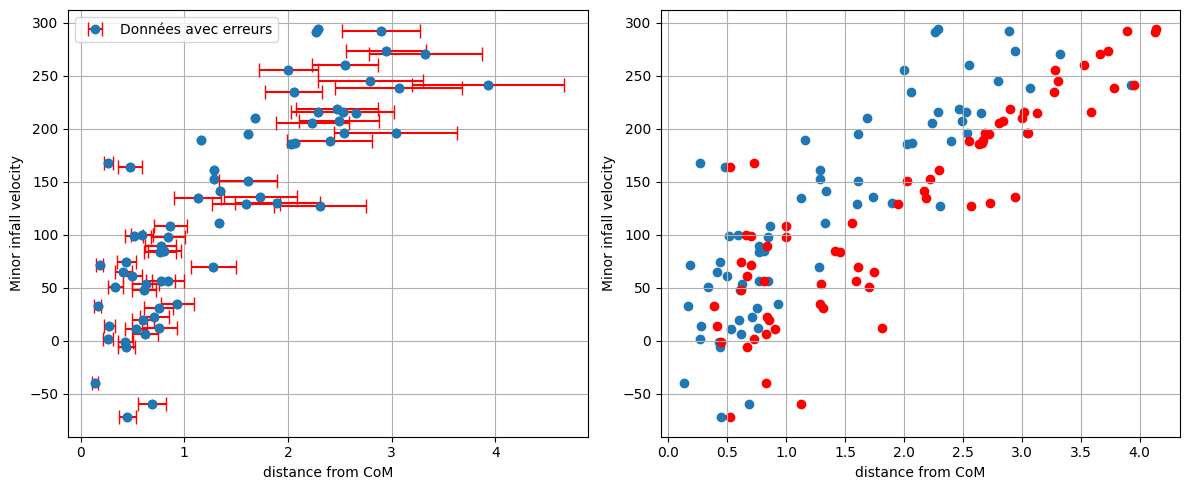

In [7]:
import matplotlib.pyplot as plt
import pandas as pd



# Filter out center-of-mass entries
mask = ~galaxy_df['Name'].str.startswith('CoM_')
x = pd.to_numeric(galaxy_df.loc[mask, "pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
x_prime =pd.to_numeric(galaxy_df.loc[mask, "dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_x = pd.to_numeric(galaxy_df.loc[mask, "e_pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
y = pd.to_numeric(galaxy_df.loc[mask, "minor_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values

# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Errorbar plot
axs[0].errorbar(x, y, xerr=e_x, fmt='o', capsize=5, ecolor='red', label="Données avec erreurs")
axs[0].scatter(x, y)
axs[0].set_xlabel("distance from CoM")
axs[0].set_ylabel("Minor infall velocity")
axs[0].legend()
axs[0].grid(True)

# Second subplot: Scatter plot
axs[1].scatter(x, y)
axs[1].scatter(x_prime,y,color='r')
axs[1].set_xlabel("distance from CoM")
axs[1].set_ylabel("Minor infall velocity")

axs[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()

In [18]:
def add_pertubative_minor_infall_velocity(df: pd.DataFrame, galaxy_center: str) -> None:
    """Add a new column containing the new velocity regarding the galaxy center using the minor infall model.

    Args:
        df (pd.DataFrame): DataFrame containing the information about galaxy
        galaxy_center (str): Name of the galaxy center
    """
    distance_center = float(df.loc[df["Name"] == galaxy_center, "Dis"].iloc[0])
    velocity_center = float(df.loc[df["Name"] == galaxy_center, "VLG"].iloc[0])
    
    e_distance_center = float(df.loc[df["Name"] == galaxy_center, "e_Dis"].iloc[0])
    e_velocity_center = float(df.loc[df["Name"] == galaxy_center, "e_VLG"].iloc[0])
    
    # Function to calculate minor velocities
    def calculate_minor_infall(row):
        rg = row['Dis']
        vg = row['VLG']
        cos_theta = row['cos_theta_' + galaxy_center]
        rgcenter = row['pertubative_dis_center_' + galaxy_center]
        e_rg = row['e_Dis']
        e_vg = row['e_VLG']
        e_rgcenter = row['e_pertubative_dis_center_' + galaxy_center]
        
        if rgcenter == 0:
            return pd.Series([0, 0])

        numerator = (velocity_center * distance_center + vg * rg) - cos_theta * (vg * distance_center + velocity_center * rg)
        
        e_r1 = (rg * e_rgcenter + e_rg * rgcenter) / (rgcenter ** 2)
        e_r2 = (distance_center * e_rgcenter + e_distance_center * rgcenter) / (rgcenter ** 2)
        
        error_velocity = (
            e_vg * (rg + cos_theta * distance_center) +
            e_velocity_center * (distance_center + cos_theta * rg)
        ) / rgcenter + e_r1 * (vg + velocity_center * cos_theta) + e_r2 * (velocity_center + vg * cos_theta)
        
        return pd.Series([numerator / rgcenter, error_velocity])
    
    result = df.apply(calculate_minor_infall, axis=1)
    df['pertubative_minor_infall_velocity_' + galaxy_center] = result[0]
    df['e_pertubative_minor_infall_velocity_' + galaxy_center] = result[1]
    
    

In [19]:
add_pertubative_minor_infall_velocity(galaxy_df,"CoM_N5128,Cen A_N5236, M83_0.76")

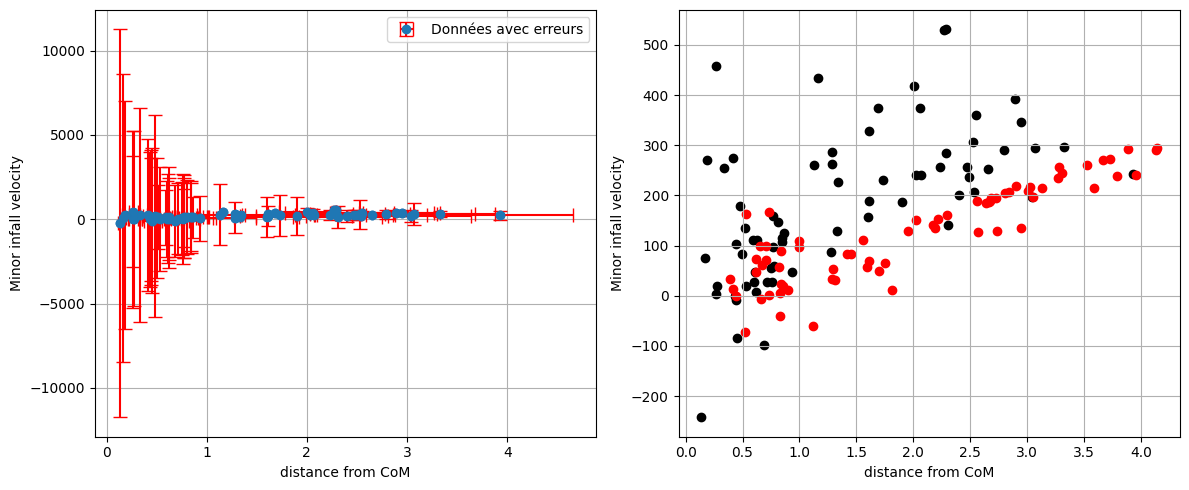

In [21]:
import matplotlib.pyplot as plt
import pandas as pd



# Filter out center-of-mass entries
mask = ~galaxy_df['Name'].str.startswith('CoM_')
x = pd.to_numeric(galaxy_df.loc[mask, "pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
x_prime =pd.to_numeric(galaxy_df.loc[mask, "dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_x = pd.to_numeric(galaxy_df.loc[mask, "e_pertubative_dis_center_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
y = pd.to_numeric(galaxy_df.loc[mask, "pertubative_minor_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
y_prime = pd.to_numeric(galaxy_df.loc[mask, "minor_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
e_y = pd.to_numeric(galaxy_df.loc[mask, "e_pertubative_minor_infall_velocity_CoM_N5128,Cen A_N5236, M83_0.76"], errors='coerce').values
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Errorbar plot
axs[0].errorbar(x, y, xerr=e_x,yerr=e_y, fmt='o', capsize=5, ecolor='red', label="Données avec erreurs")
axs[0].scatter(x, y)
axs[0].set_xlabel("distance from CoM")
axs[0].set_ylabel("Minor infall velocity")
axs[0].legend()
axs[0].grid(True)

# Second subplot: Scatter plot
axs[1].scatter(x, y,color='black')
axs[1].scatter(x_prime,y_prime,color='r')
axs[1].set_xlabel("distance from CoM")
axs[1].set_ylabel("Minor infall velocity")

axs[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()